In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from astropy.io import fits

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)

    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

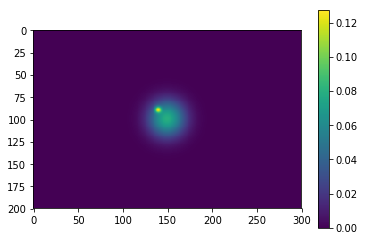

In [2]:
# Preparing sample input
N_x = 300
N_y = 200
X = np.linspace(0, 300, N_x)
Y = np.linspace(0, 200, N_y)
X, Y = np.meshgrid(X, Y)

mu = np.array([150., 100.])
Sigma = np.array([[200, 0], [0,  200]])

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


Z1 = multivariate_gaussian(pos, mu, Sigma) * 100
Z3 = multivariate_gaussian(pos, mu - 10 , Sigma * 0.03) * 3

Z = Z1 + Z3

plt.figure()
plt.imshow(Z)
plt.colorbar()
plt.show()

In [3]:
# performing decomposition
import constrained_diffusion_decomposition as cdd
result, residual = cdd.constrained_diffusion_decomposition(Z)

ntot 6
i = 0
kernel_size 0.31622776601683794
i = 1
kernel_size 0.34641016151377546
i = 2
kernel_size 0.6928203230275509
i = 3
kernel_size 1.3856406460551018
i = 4
kernel_size 2.7712812921102037
i = 5
kernel_size 5.542562584220407


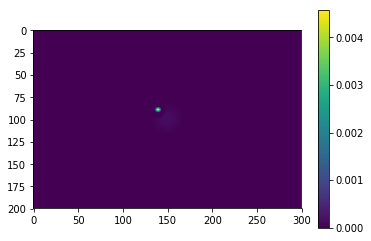

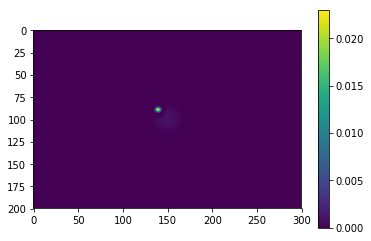

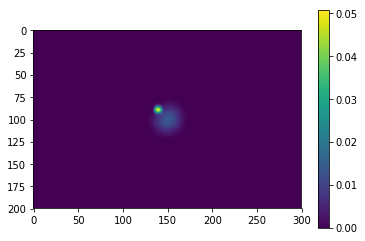

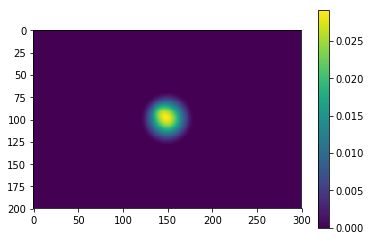

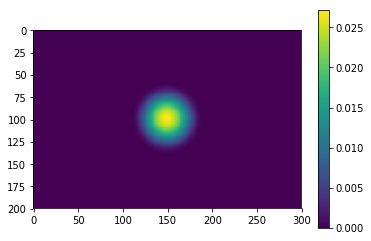

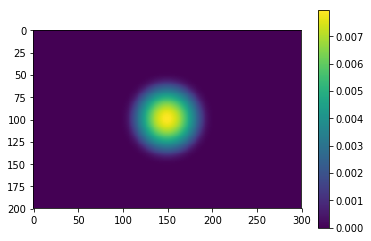

In [4]:
# visualizing results
from pylab import *
for i in result:
    figure()
    imshow(i)
    colorbar()